## The third system example (Duffing Equation)

---

We have the third system ([Duffing equation](https://en.wikipedia.org/wiki/Duffing_equation)) of following form:
$$
x'' = kx+ax^{3}+bx'
$$
where $k<0$ and $b<0$. (we set $x_{0}=x$ and $x_{1}=x'$). Then we have the system of the ODEs:
$$
\begin{cases}
x_{0}'=x_1\\
x_{1}'=kx_{0}+ax_{0}^{3} + bx_1
\end{cases}
$$
By introduce one new variable $w_{0}=x_{0}^{2}$. Then we got the system of the ODEs:
$$
\begin{cases}
x_{0}'=x_1\\
x_{1}'=kx_{0}+ax_{0}w_{0} + bx_{1}\\
w_{0}' = 2x_{0}x_{0}' = 2x_{0}x_{1}
\end{cases}
$$

---

In [43]:
import numpy as np
import sympy as sym
sym.init_printing()
import matplotlib.pyplot as plt

We change the method of quadratization, we have $w_{0}=x_{0}^{2}-mx_{0}$, then we got the new system of the ODEs:
$$
\begin{cases}
x_{0}'=x_1\\
x_{1}'= kx_{0}+ax_{0}w_{0} + bx_{1} +amx_{0}^2 = (am^{2}+k)x_{0} x_{0}+ax_{0}w_{0} + bx_{1} + amw_0 \\ 
w_{0}' = 2x_{0}x_{1} - mx_{1}
\end{cases}
$$
Then we have $F_1$ that
$$
F_{1} = \begin{bmatrix}
0 & 1 & 0\\
k & b & 0\\
0 & -m & 0
\end{bmatrix}
\quad \text{or} \quad 
F_{1} = \begin{bmatrix}
0 & 1 & 0\\
am^{2}+k & b & am\\
0 & -m & 0
\end{bmatrix}
$$

In [44]:
a, b = sym.symbols('a b')
m0, m1 = sym.symbols('m0 m1')
k = sym.symbols('k')
lamda = sym.symbols('lamda')
alpha1, alpha2, alpha3 = sym.symbols('alpha1 alpha2 alpha3')

def eigenvalue_solver(F):
    p = F.charpoly(lamda)
    roots = sym.solve(p, lamda)
    return p, roots[0], roots[1], roots[2]

In [45]:
F = sym.Matrix([[0, 1, 0], [k, b, 0], [0, -m0, 0]])
display(F)
p, lambda1, lambda2, lambda3 = eigenvalue_solver(F)
display(p)

# solve the eigenvalue problem
roots = sym.solve(p, lamda)
display(roots[0])
display(roots[1])
display(roots[2])

print('-' * 80)

F = sym.Matrix([[0, 1, 0], [a * m0**2 + k, b, a * m0], [0, -m0, 0]])
display(F)
p, lambda1, lambda2, lambda3 = eigenvalue_solver(F)
display(p)

# solve the eigenvalue problem
roots = sym.solve(p, lamda)
display(roots[0])
display(roots[1])
display(roots[2])

⎡0   1   0⎤
⎢         ⎥
⎢k   b   0⎥
⎢         ⎥
⎣0  -m₀  0⎦

--------------------------------------------------------------------------------


⎡    0       1    0  ⎤
⎢                    ⎥
⎢    2               ⎥
⎢a⋅m₀  + k   b   a⋅m₀⎥
⎢                    ⎥
⎣    0      -m₀   0  ⎦

In [46]:
alpha1_mat = alpha1 * sym.Matrix([[m0, 0, 1], [0, 0, 0], [0, 0, 0]])
alpha2_mat = alpha2 * sym.Matrix([[0, 0, 0], [m0, 0, 1], [0, 0, 0]])
alpha3_mat = alpha3 * sym.Matrix([[0, 0, 0], [0, 0, 0], [m0, 0, 1]])
F = F + alpha1_mat 
display(F)
p, lambda1, lambda2, lambda3 = eigenvalue_solver(F) 
display(p)

# solve the eigenvalue problem
roots = sym.solve(p, lamda)
display(roots[0])
display(roots[1])
display(roots[2])

⎡  α₁⋅m₀     1    α₁ ⎤
⎢                    ⎥
⎢    2               ⎥
⎢a⋅m₀  + k   b   a⋅m₀⎥
⎢                    ⎥
⎣    0      -m₀   0  ⎦

### Apply the Routh-Hurwitz Criterion

---


From the **Routh-Hurwitz Criterion**, for the equation with highest degree $n$, if $n$ is **odd**, then we got
$$
\left.\begin{array}{llllllll}
a_n & a_{n-2} & a_{n-4} & \cdots & a_5 & a_3 & a_1 & a_{-1} \\
a_{n-1} & a_{n-3} & a_{n-5} & \cdots & a_4 & a_2 & a_0 & a_{-2} \\
c_{n-1} & c_{n-3} & c_{n-5} & \cdots & c_4 & c_2 & c_0 & \\
d_{n-1} & d_{n-3} & d_{n-5} & \cdots & d_4 & d_2 & d_0 & \\
\vdots & & & & & & & \\
u_{n-1} & u_{n-3} & & & & & & \\
u_{n-1} & u_{n-3} & & & & & &
\end{array}\right\} n+1 \text { rows }
$$
For $n$ is **even**, then we got
$$
\left.\begin{array}{lllllll}
a_n & a_{n-2} & a_{n-4} & \cdots & a_4 & a_2 & a_0 \\
a_{n-1} & a_{n-3} & a_{n-5} & \cdots & a_3 & a_1 & a_{-1} \\
c_{n-1} & c_{n-3} & c_{n-5} & \cdots & c_3 & c_1 & \\
d_{n-1} & d_{n-3} & d_{n-5} & \cdots & d_3 & d_1 & \\
\vdots & & & & & \\
u_{n-1} & u_{n-3} & & & & & \\
u_{n-1} & u_{n-3} & & & & & \\
v_{n-1} & & & & & &
\end{array}\right\} n+1 \text { rows }
$$
where
$$
\begin{gathered}
c_{n-1}=\frac{-\left|\begin{array}{ll}
a_n & a_{n-2} \\
a_{n-1} & a_{n-3}
\end{array}\right|}{a_{n-1}}, c_{n-3}=\frac{-\left|\begin{array}{ll}
a_n & a_{n-4} \\
a_{n-1} & a_{n-5}
\end{array}\right|}{a_{n-1}} \\
d_{n-1}=\frac{-\left|\begin{array}{ll}
a_{n-1} & a_{n-3} \\
c_{n-1} & c_{n-3}
\end{array}\right|}{c_{n-1}}, d_{n-3}=\frac{-\left|\begin{array}{ll}
a_{n-1} & a_{n-5} \\
c_{n-1} & c_{n-5}
\end{array}\right|}{c_{n-1}}
\end{gathered}
$$
we have the following Rouch table for the equation $x^{3}+bx^{2}+cx + d=0$
$$
\begin{array}{ccc}
1 & c & 0 \\
b & d & 0 \\
\frac{bc-d}{b} & 0 & \\
d & 0 &
\end{array}
$$
Then in order to have all the roots in the left half plane, we need to have all the entries in the first column are positive (since $1$ is positive). Then we have the condition that $b, c, d > 0$ and $bc > d$

In [47]:
import pandas as pd

# Compute coefficients
b_coef = p.coeffs()[1]
c_coef = p.coeffs()[2]
d_coef = p.coeffs()[3]
display(b_coef)
display(c_coef)
display(d_coef)

In [48]:
b_coef = - alpha1 * m0 - b
c_coef = alpha1 * m0 * b - k
d_coef = alpha1 * m0 * k

# Define function to test coefficients
def test_coef(k_val, m0_val, b_val, a1_val):
    b_coef_val = b_coef.subs([(k, k_val), (m0, m0_val), (b, b_val), (alpha1, a1_val)])
    c_coef_val = c_coef.subs([(k, k_val), (m0, m0_val), (b, b_val), (alpha1, a1_val)])
    d_coef_val = d_coef.subs([(k, k_val), (m0, m0_val), (b, b_val), (alpha1, a1_val)])
    if b_coef_val > 0 and c_coef_val > 0 and d_coef_val > 0 and b_coef_val * c_coef_val > d_coef_val:
        return True
    else:
        return False
      
# Test coefficients for all combinations of input values
results = []
for a1_val in [-10, 0, 11]:
    for k_val in [-10, 0, 11]:
        for m0_val in [-10, 0, 11]:
            for b_val in [-10, 0, 11]:
                if test_coef(k_val, m0_val, b_val, a1_val):
                    b_coef_val = b_coef.subs([(k, k_val), (m0, m0_val), (b, b_val), (alpha1, a1_val)])
                    c_coef_val = c_coef.subs([(k, k_val), (m0, m0_val), (b, b_val), (alpha1, a1_val)])
                    d_coef_val = d_coef.subs([(k, k_val), (m0, m0_val), (b, b_val), (alpha1, a1_val)])
                    results.append({'k': k_val, 'm0': m0_val, 'b': b_val, 'alpha1': a1_val, 'b_coef': b_coef_val, 'c_coef': c_coef_val, 'd_coef': d_coef_val})
    
    
    
# Convert results to DataFrame
df = pd.DataFrame(results)

# Save DataFrame to CSV file
df.to_csv('results.csv', index=False)
df

,k,m0,b,alpha1,b_coef,c_coef,d_coef
0,-10,11,-10,-10,120,1110,1100
1,-10,-10,-10,11,120,1110,1100


In [49]:
df.iloc[0]
result = []
symbols_list = [k, m0, b, alpha1]
for symbol in symbols_list:
    symbol = df.iloc[0][symbol.name]
    
p = p.subs([(alpha1, df.iloc[0][alpha1.name]), (k, df.iloc[0][k.name]), (m0, df.iloc[0][m0.name]), (b, df.iloc[0][b.name])])
F = F.subs([(alpha1, df.iloc[0][alpha1.name]), (k, df.iloc[0][k.name]), (m0, df.iloc[0][m0.name]), (b, df.iloc[0][b.name])])
display(p)
display(F)
roots = sym.solve(p, lamda)
display(roots[0])
display(roots[1])
display(roots[2])

⎡   -110      1   -10 ⎤
⎢                     ⎥
⎢121⋅a - 10  -10  11⋅a⎥
⎢                     ⎥
⎣    0       -11   0  ⎦

By introduce the zero term $0 = w_{0} + mx_{0}-x_{0}^{2}$, we got
$$
\begin{cases}
x_{0}'=x_1 + \alpha_1 w_{0} + \alpha_1 mx_{0}- \alpha_1 x_{0}^{2}\\
x_{1}'= kx_{0}+ax_{0}w_{0} + bx_{1} + amx_{0}^{2}\\ 
w_{0}' = 2x_{0}x_{1} - mx_{1}
\end{cases}
$$
In this way, we have the $F_2$ as following:
$$
F_2 = \begin{bmatrix}
-\alpha_1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
am & 0 & a & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$


In [50]:
F2 = sym.Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, a, 0, 0, 0, 0, 0, 0],
                 [1, 2, 0, 0, 0, 0, 0, 0, 0]])
display(F2.T @ F2)

F_ = (F2.T @ F2)[0:3, 0:3]
display(F_)
p, lambda1, lambda2, lambda3 = eigenvalue_solver(F_)
display(p)
display(lambda1)
display(lambda2)
display(lambda3)


⎡1  2  0   0  0  0  0  0  0⎤
⎢                          ⎥
⎢2  4  0   0  0  0  0  0  0⎥
⎢                          ⎥
⎢       2                  ⎥
⎢0  0  a   0  0  0  0  0  0⎥
⎢                          ⎥
⎢0  0  0   0  0  0  0  0  0⎥
⎢                          ⎥
⎢0  0  0   0  0  0  0  0  0⎥
⎢                          ⎥
⎢0  0  0   0  0  0  0  0  0⎥
⎢                          ⎥
⎢0  0  0   0  0  0  0  0  0⎥
⎢                          ⎥
⎢0  0  0   0  0  0  0  0  0⎥
⎢                          ⎥
⎣0  0  0   0  0  0  0  0  0⎦

⎡1  2  0 ⎤
⎢        ⎥
⎢2  4  0 ⎥
⎢        ⎥
⎢       2⎥
⎣0  0  a ⎦

## Try with adding $x_1$

--- 

We change the method of quadratization, we have $w_{0}=x_{0}^{2}-m_{0}x_{0}-m_{1}x_{1}$, then we got the new system of the ODEs:
$$
\begin{cases}
x_{0}'=x_1\\
x_{1}'= kx_{0}+ax_{0}w_{0} + am_{0}x_{0}^{2} + am_{1}x_{0}x_{1} + bx_{1} \\ 
\begin{aligned}
w_{0}' = & 2x_{0}x_{0}' - m_{0}x_{0}' - m_{1}x_{1}'\\
= & 2x_{0}x_{1} - m_{0}x_{1} - m_{1}(kx_{0}+ax_{0}w_{0} + am_{0}x_{0}^{2} + am_{1}x_{0}x_{1} + bx_{1})\\

\end{aligned}
\end{cases}
$$
Then we have $F_1$ that
$$
F_{1} = \begin{bmatrix}
0 & 1 & 0\\
k & b & 0\\
-m_{1} & -m_{0} & 0
\end{bmatrix}
$$

⎡ 0    1   0⎤
⎢           ⎥
⎢ k    b   0⎥
⎢           ⎥
⎣-m₁  -m₀  0⎦

⎡α₁⋅m₀  α₁⋅m₁ + 1  α₁⎤
⎢                    ⎥
⎢  k        b      0 ⎥
⎢                    ⎥
⎣ -m₁      -m₀     0 ⎦

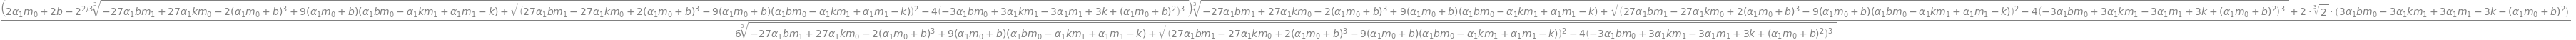

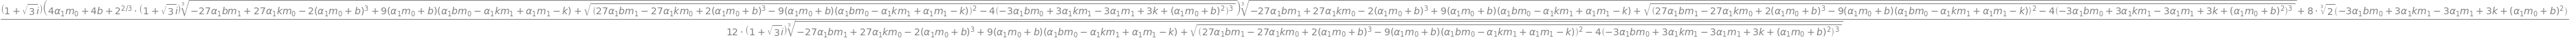

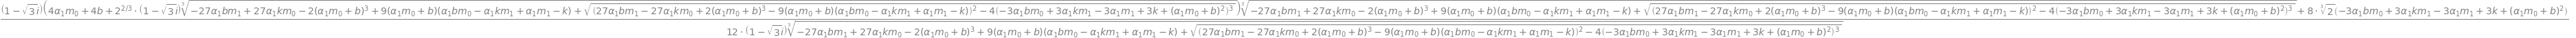

In [51]:
F = sym.Matrix([[0, 1, 0], [k, b, 0], [-m1, -m0, 0]])
display(F)
p, lambda1, lambda2, lambda3 = eigenvalue_solver(F)
display(p)

# solve the eigenvalue problem
roots = sym.solve(p, lamda)
display(roots[0])
display(roots[1])
display(roots[2])

alpha1_mat = alpha1 * sym.Matrix([[m0, m1, 1], [0, 0, 0], [0, 0, 0]])
alpha2_mat = alpha2 * sym.Matrix([[0, 0, 0], [m0, m1, 1], [0, 0, 0]])
alpha3_mat = alpha3 * sym.Matrix([[0, 0, 0], [0, 0, 0], [m0, m1, 1]])
F = F + alpha1_mat 
display(F)
p, lambda1, lambda2, lambda3 = eigenvalue_solver(F)
display(p)

# solve the eigenvalue problem
roots = sym.solve(p, lamda)
display(sym.simplify(roots[0]))
display(sym.simplify(roots[1]))
display(sym.simplify(roots[2]))

### Application with the theorem of the proof

---

$$
\begin{cases}
        x_{0}'=x_1\\
        x_{1}'=kx_{0}+ax_{0}v_{2,0} + bx_1 \\ 
        v_{2,0}' = (\frac{b+\sqrt{b^2+4k}}{2})v_{2,0} -(\frac{b+\sqrt{b^2+4k}}{2}) x_{0}^{2}+2x_{0}x_{1}
    \end{cases}
    $$
Then we got for $F_2$ that
$$
F_2 = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & a & 0 & 0 & 0 & 0 & 0 & 0\\
-(\frac{b+\sqrt{b^2+4k}}{2}) & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

In [52]:
F = sym.Matrix([[0, 1, 0], [k, b, 0], [0, 0, 0]])
p, lambda1, lambda2, lambda3 = eigenvalue_solver(F)
roots = sym.solve(p, lamda)

roots = sym.solve(p, lamda)
c = sym.symbols('c')
F2 = sym.Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, a, 0, 0, 0, 0, 0, 0],
                 [c, 2, 0, 0, 0, 0, 0, 0, 0]])
display(F2.T @ F2)

# solve the eigenvalue problem of F2.T @ F2
F_ = (F2.T @ F2)[0:3, 0:3]
p, lambda1, lambda2, lambda3 = eigenvalue_solver(F_)
display(p)
display(lambda1)
display(lambda2)
display(lambda3)

⎡ 2                            ⎤
⎢c    2⋅c  0   0  0  0  0  0  0⎥
⎢                              ⎥
⎢2⋅c   4   0   0  0  0  0  0  0⎥
⎢                              ⎥
⎢           2                  ⎥
⎢ 0    0   a   0  0  0  0  0  0⎥
⎢                              ⎥
⎢ 0    0   0   0  0  0  0  0  0⎥
⎢                              ⎥
⎢ 0    0   0   0  0  0  0  0  0⎥
⎢                              ⎥
⎢ 0    0   0   0  0  0  0  0  0⎥
⎢                              ⎥
⎢ 0    0   0   0  0  0  0  0  0⎥
⎢                              ⎥
⎢ 0    0   0   0  0  0  0  0  0⎥
⎢                              ⎥
⎣ 0    0   0   0  0  0  0  0  0⎦

<ipython-input-53-048fd1e115d2>:2: RuntimeWarning: invalid value encountered in sqrt
  return np.maximum(np.abs(a), np.sqrt((b**2 + b * np.sqrt(b**2 + 4 * k)) / 2 + k + 4))


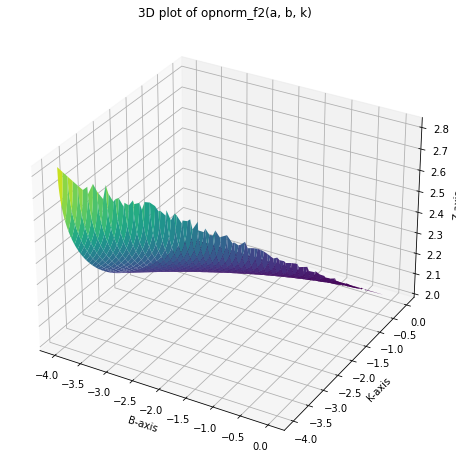

In [53]:
def opnorm_f2(a, b, k):
    return np.maximum(np.abs(a), np.sqrt((b**2 + b * np.sqrt(b**2 + 4 * k)) / 2 + k + 4))

b = np.linspace(-4, 0, 400)
k = np.linspace(-4, 0, 400)

B, K = np.meshgrid(b, k)
A = 0  # 设置a值为常数0，可以根据需要修改
Z = opnorm_f2(A, B, K)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B, K, Z, cmap='viridis')
ax.set_xlabel('B-axis')
ax.set_ylabel('K-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D plot of opnorm_f2(a, b, k)')

plt.show()
